ForGroup : 26194
GroupGal : 83093
StellarMasses : 114685
EnvMeasures : 67996
visualMorph : 38795
Join GroupGal & StellarMasses 43463
GroupGal & StellarMasses
['CATAID', 'RA', 'Dec', 'Z_1', 'Rpetro', 'DM_100_25_75', 'SURVEY_CODE_1', 'SigErr', 'GroupID', 'RankIterCen', 'SepIterCen', 'CoSepIterCen', 'AngSepIterCen', 'RankBCG', 'SepBCG', 'CoSepBCG', 'AngSepBCG', 'RankCen', 'SepCen', 'CoSepCen', 'AngSepCen', 'Z_2', 'nQ', 'SURVEY_CODE_2', 'SURVEY_CLASS', 'Z_TONRY', 'fluxscale', 'zmax_19p8', 'zmax_19p4', 'zmax_19p0', 'zmax_17p8', 'nbands', 'S2N', 'PPP', 'logmstar', 'dellogmstar', 'logmoverl_i', 'dellogmoverl_i', 'logage', 'dellogage', 'logtau', 'dellogtau', 'logmintsfh', 'dellogmintsfh', 'logmremnants', 'dellogmremnants', 'metal', 'delmetal', 'extBV', 'delextBV', 'logLWage', 'dellogLWage', 'gminusi', 'delgminusi', 'uminusr', 'deluminusr', 'gminusi_stars', 'uminusr_stars', 'C_logM_ur', 'C_logM_gi', 'C_logM_eBV', 'fitphot_u', 'delfitphot_u', 'absmag_u', 'delabsmag_u', 'absmag_u_stars', 'fitphot

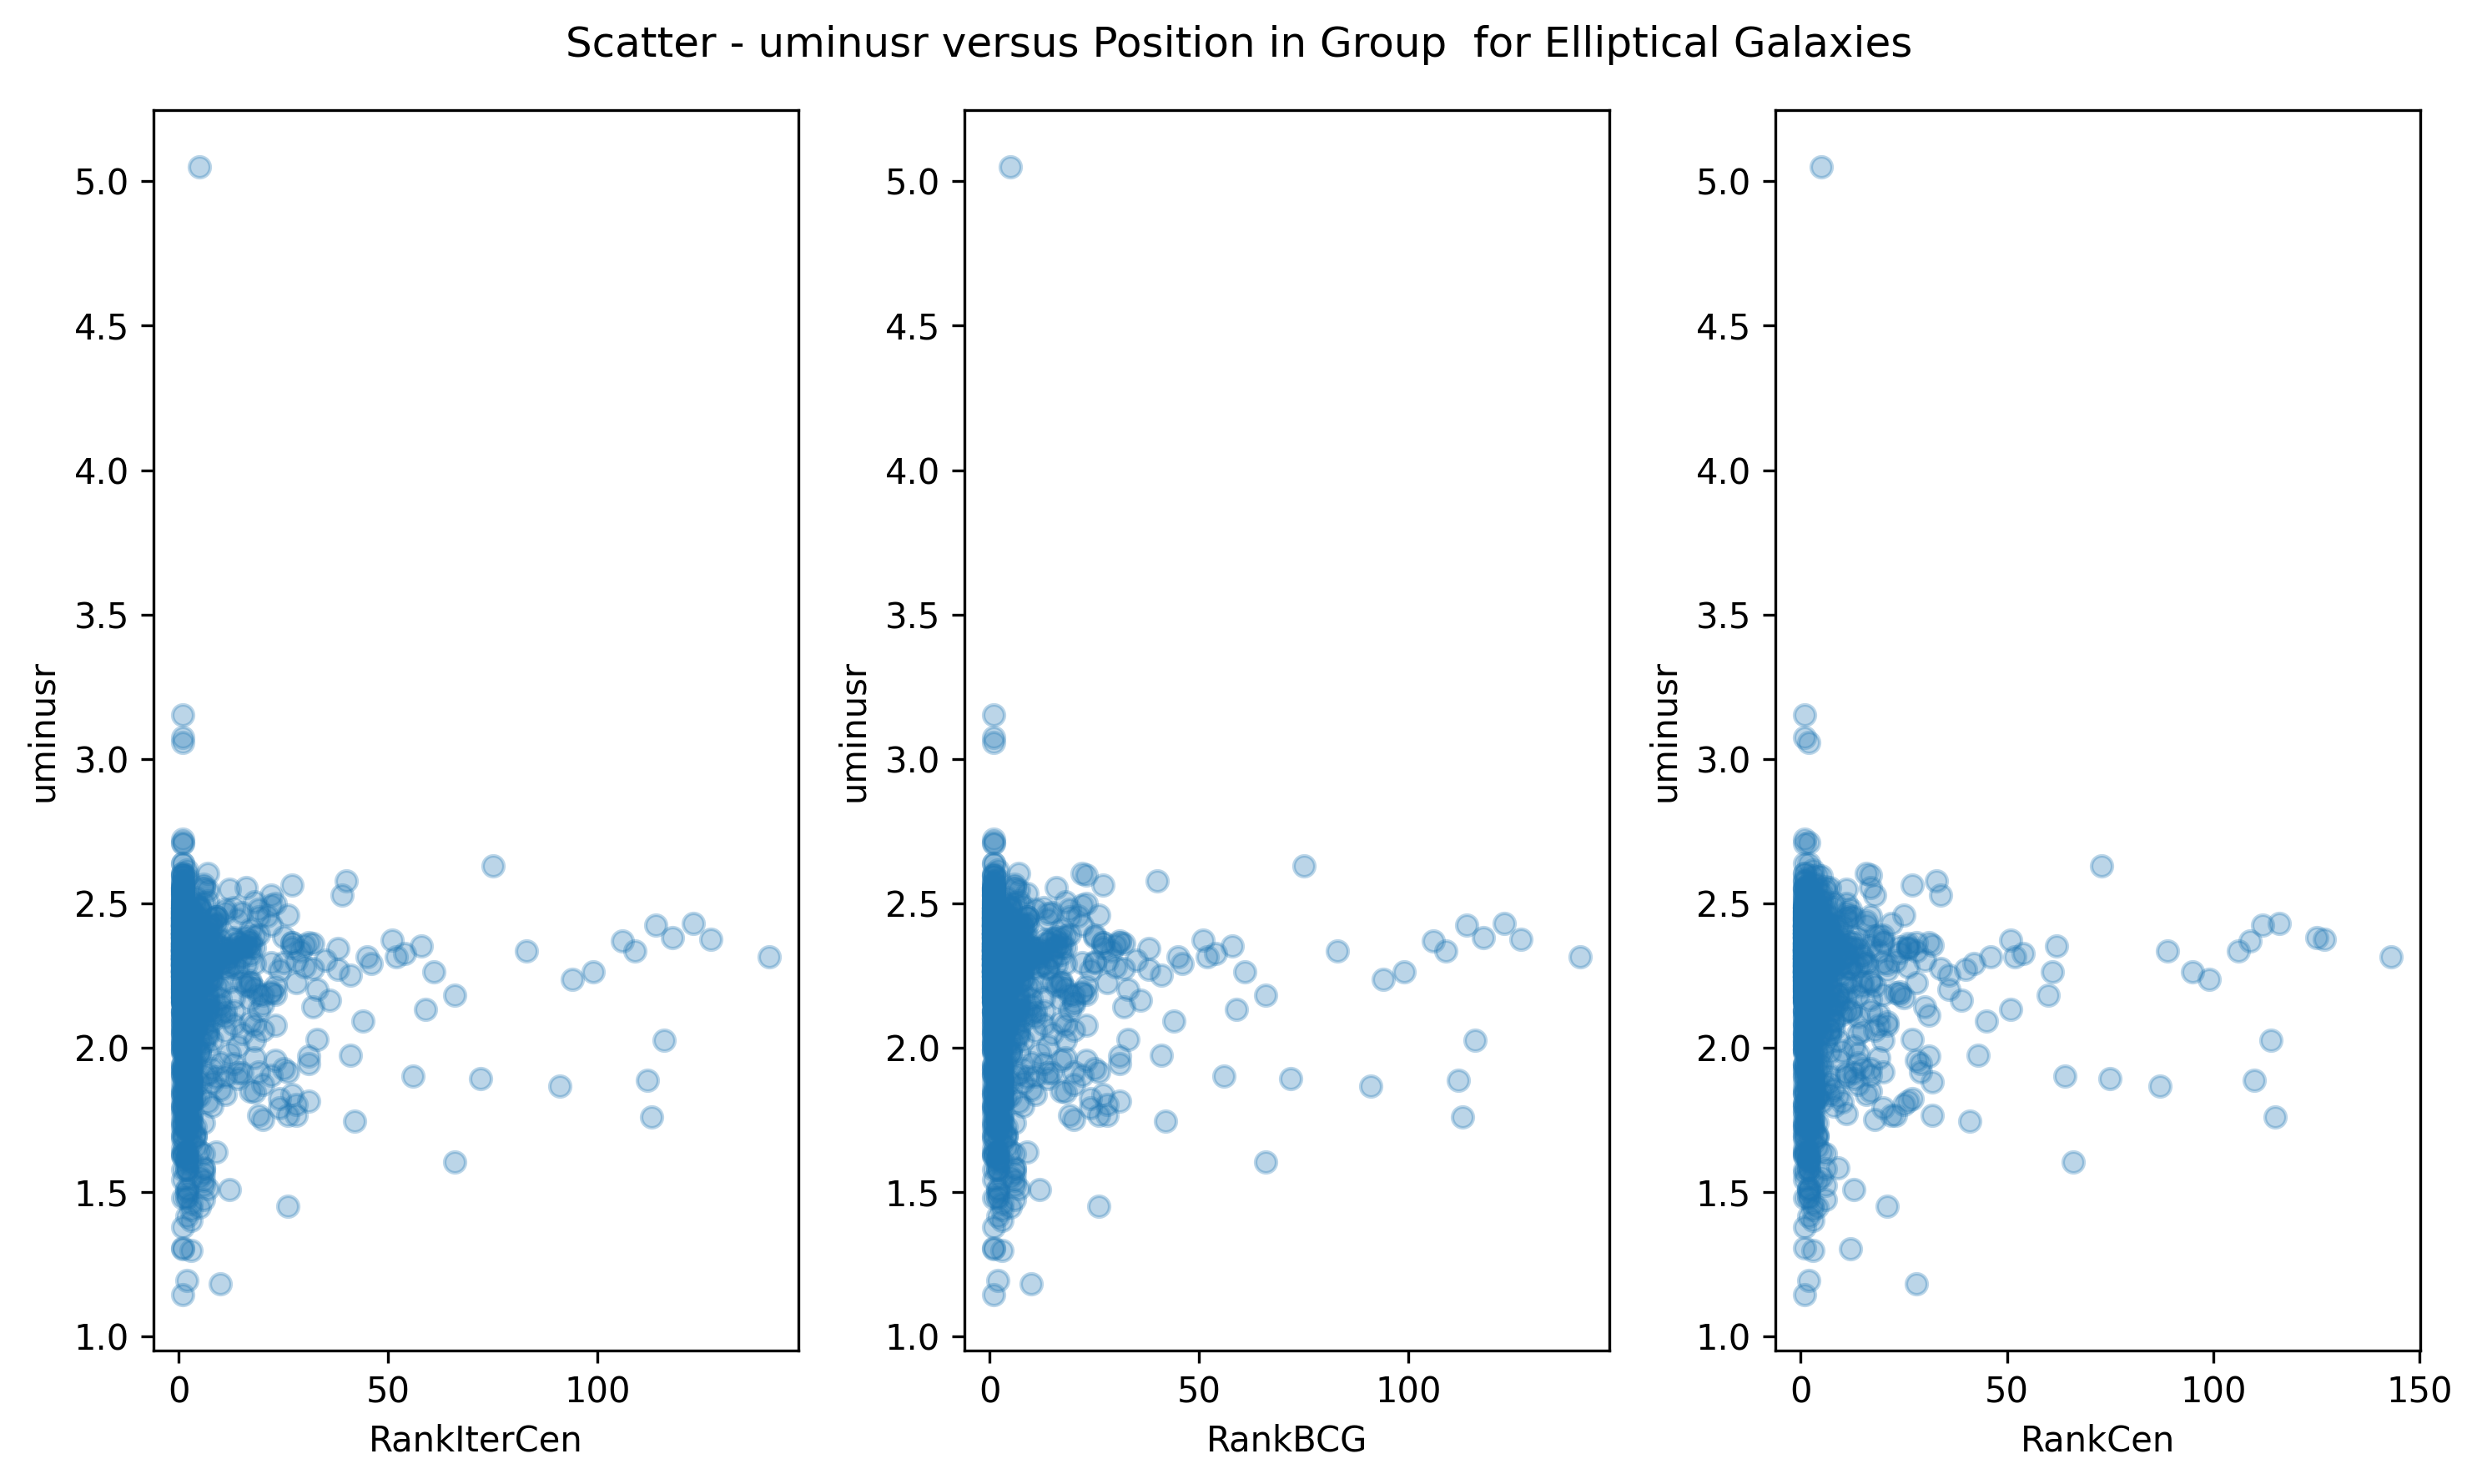

1.1463857
5.0509887
Non LOG - Pearson Correlation x: RankIterCen y: uminusr Correlation : -0.03699766507522864 T-Test : 0.18832175665800419
Non LOG Linear Regresion x: RankIterCen y: uminusr slope : -0.000692670594780846 Intercept 2.2243586120073178 Correlation -0.03699766507522861 Wald test 0.1883217566581189 0.0005262370931249472
Non LOG - Pearson Correlation x: RankBCG y: uminusr Correlation : -0.03601813674089039 T-Test : 0.2002965606562965
Non LOG Linear Regresion x: RankBCG y: uminusr slope : -0.0006732996489693182 Intercept 2.22428863724255 Correlation -0.036018136740890376 Wald test 0.20029656065639173 0.0005254503905971406
Non LOG - Pearson Correlation x: RankCen y: uminusr Correlation : -0.03870179177161477 T-Test : 0.16875982452528807
Non LOG Linear Regresion x: RankCen y: uminusr slope : -0.0007308662646539927 Intercept 2.2246092303374874 Correlation -0.038701791771614764 Wald test 0.16875982452536614 0.0005307717674696261


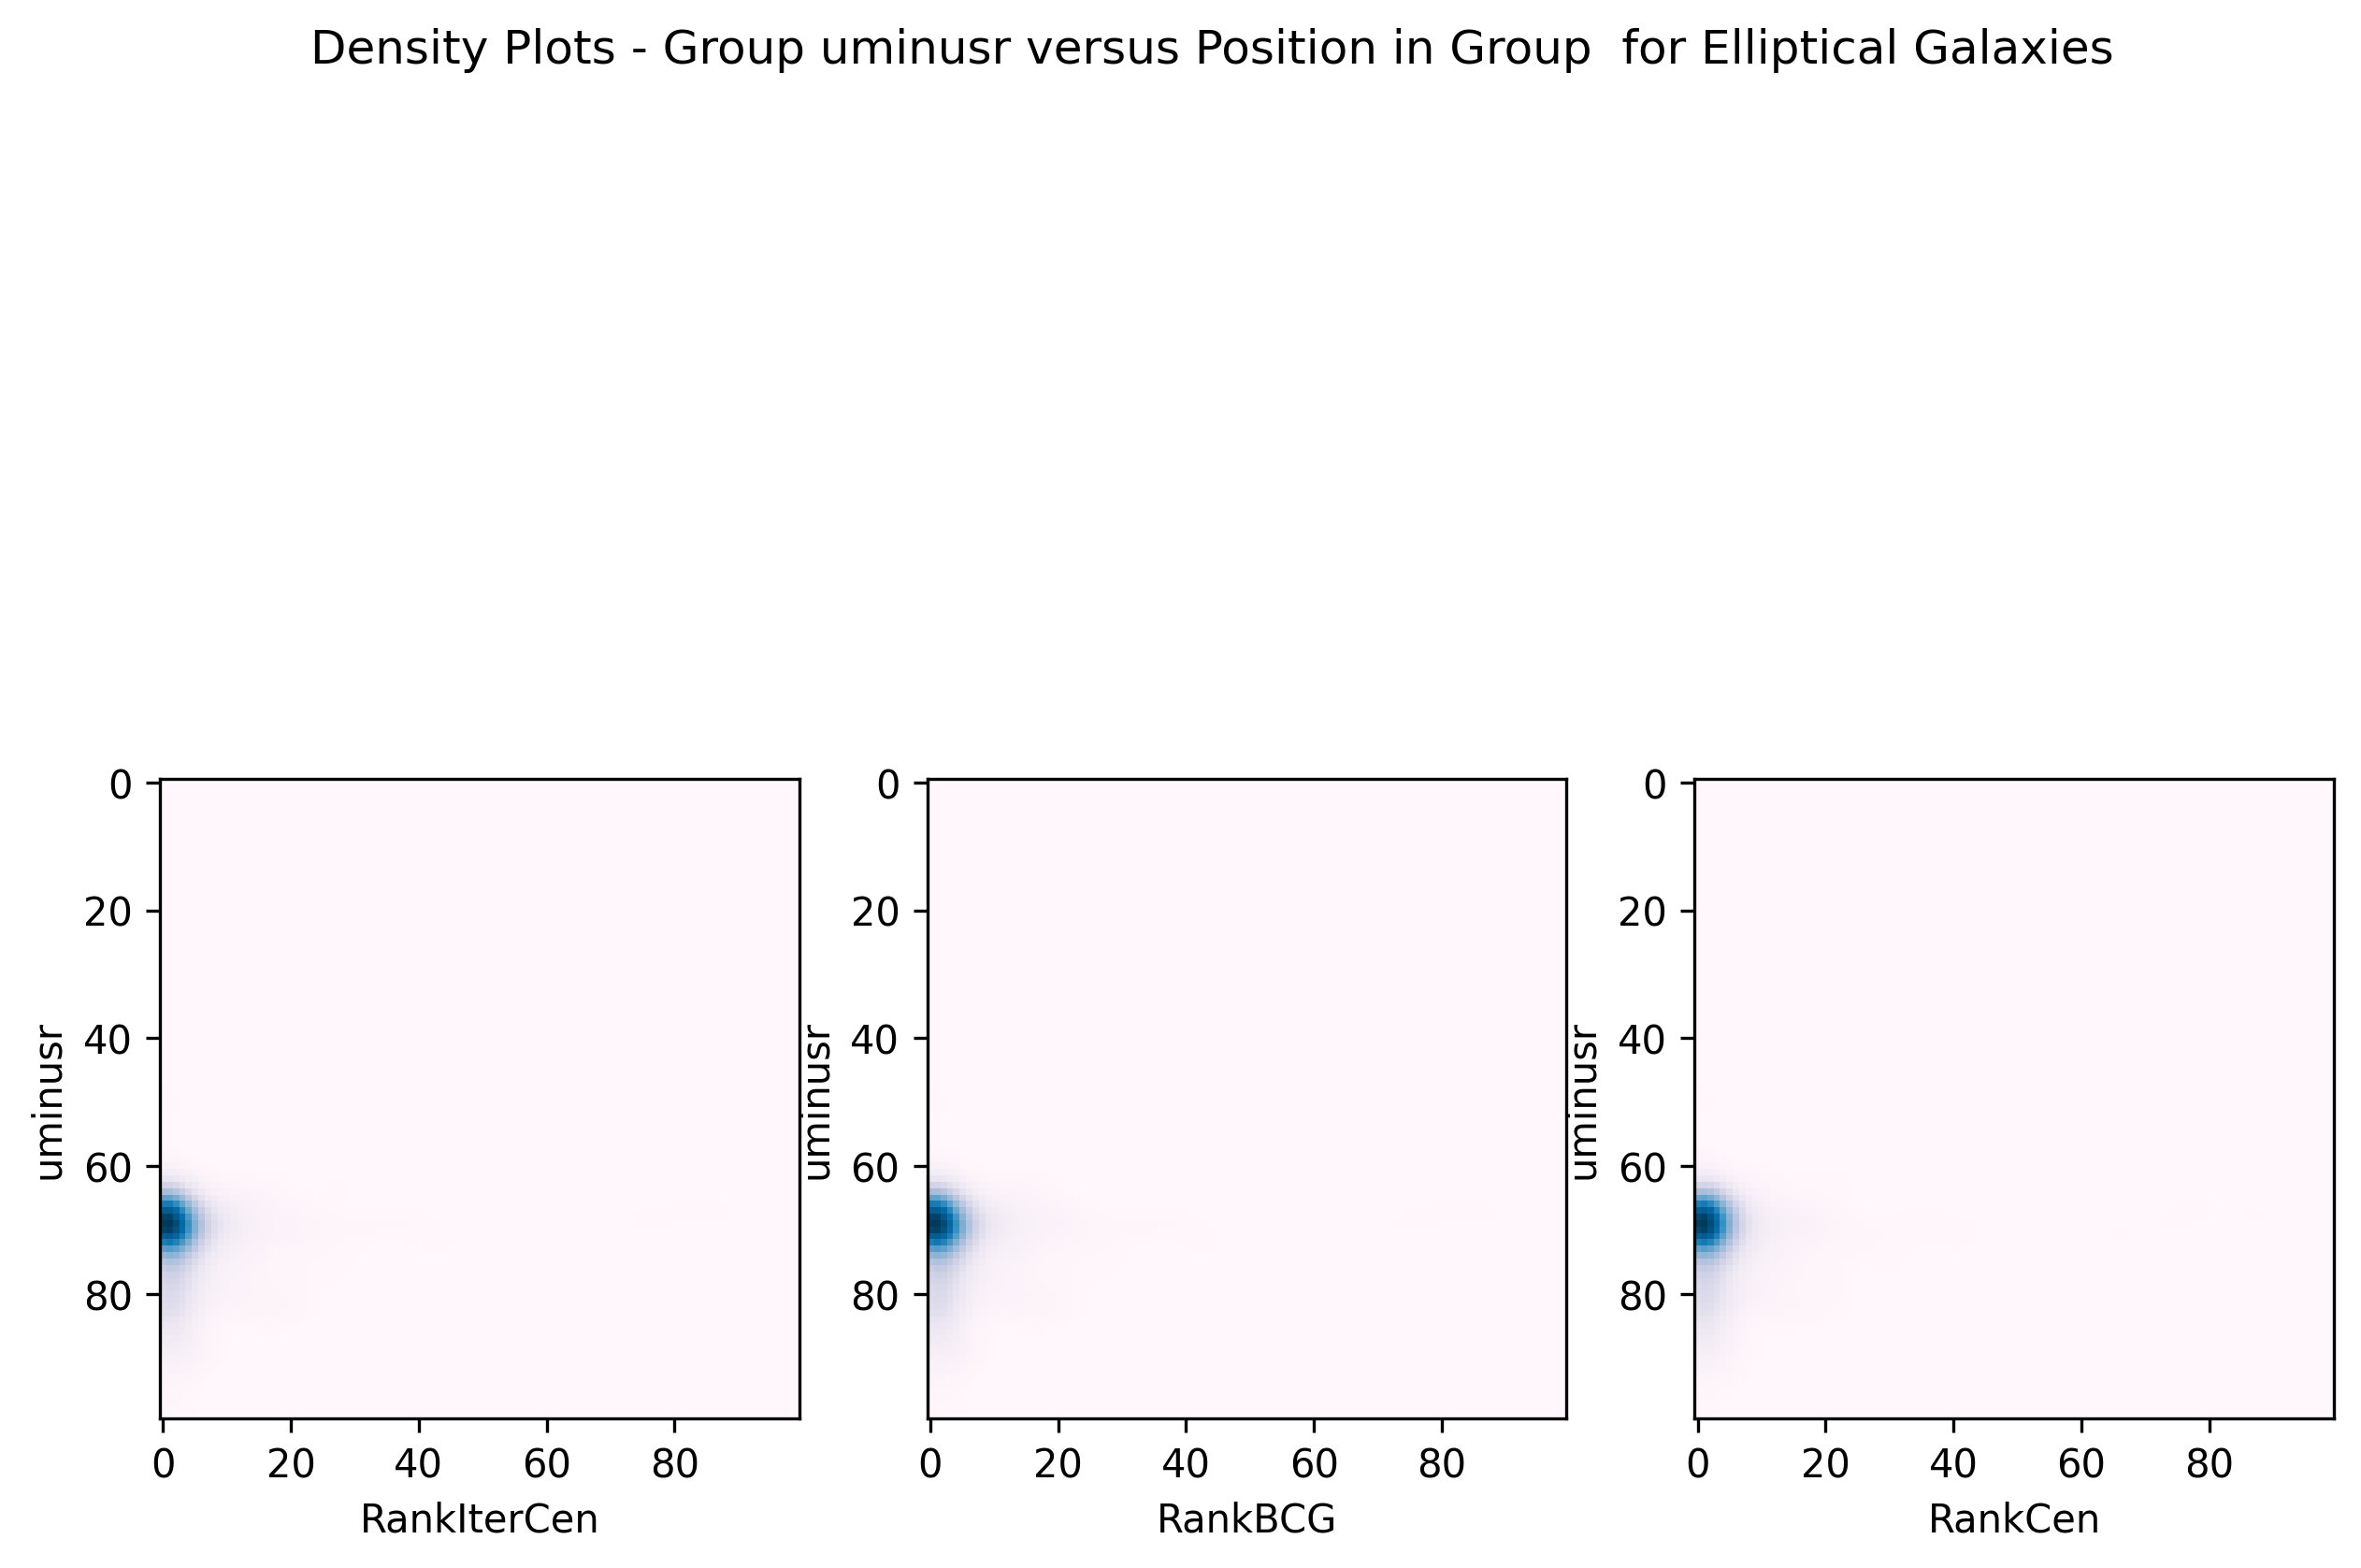

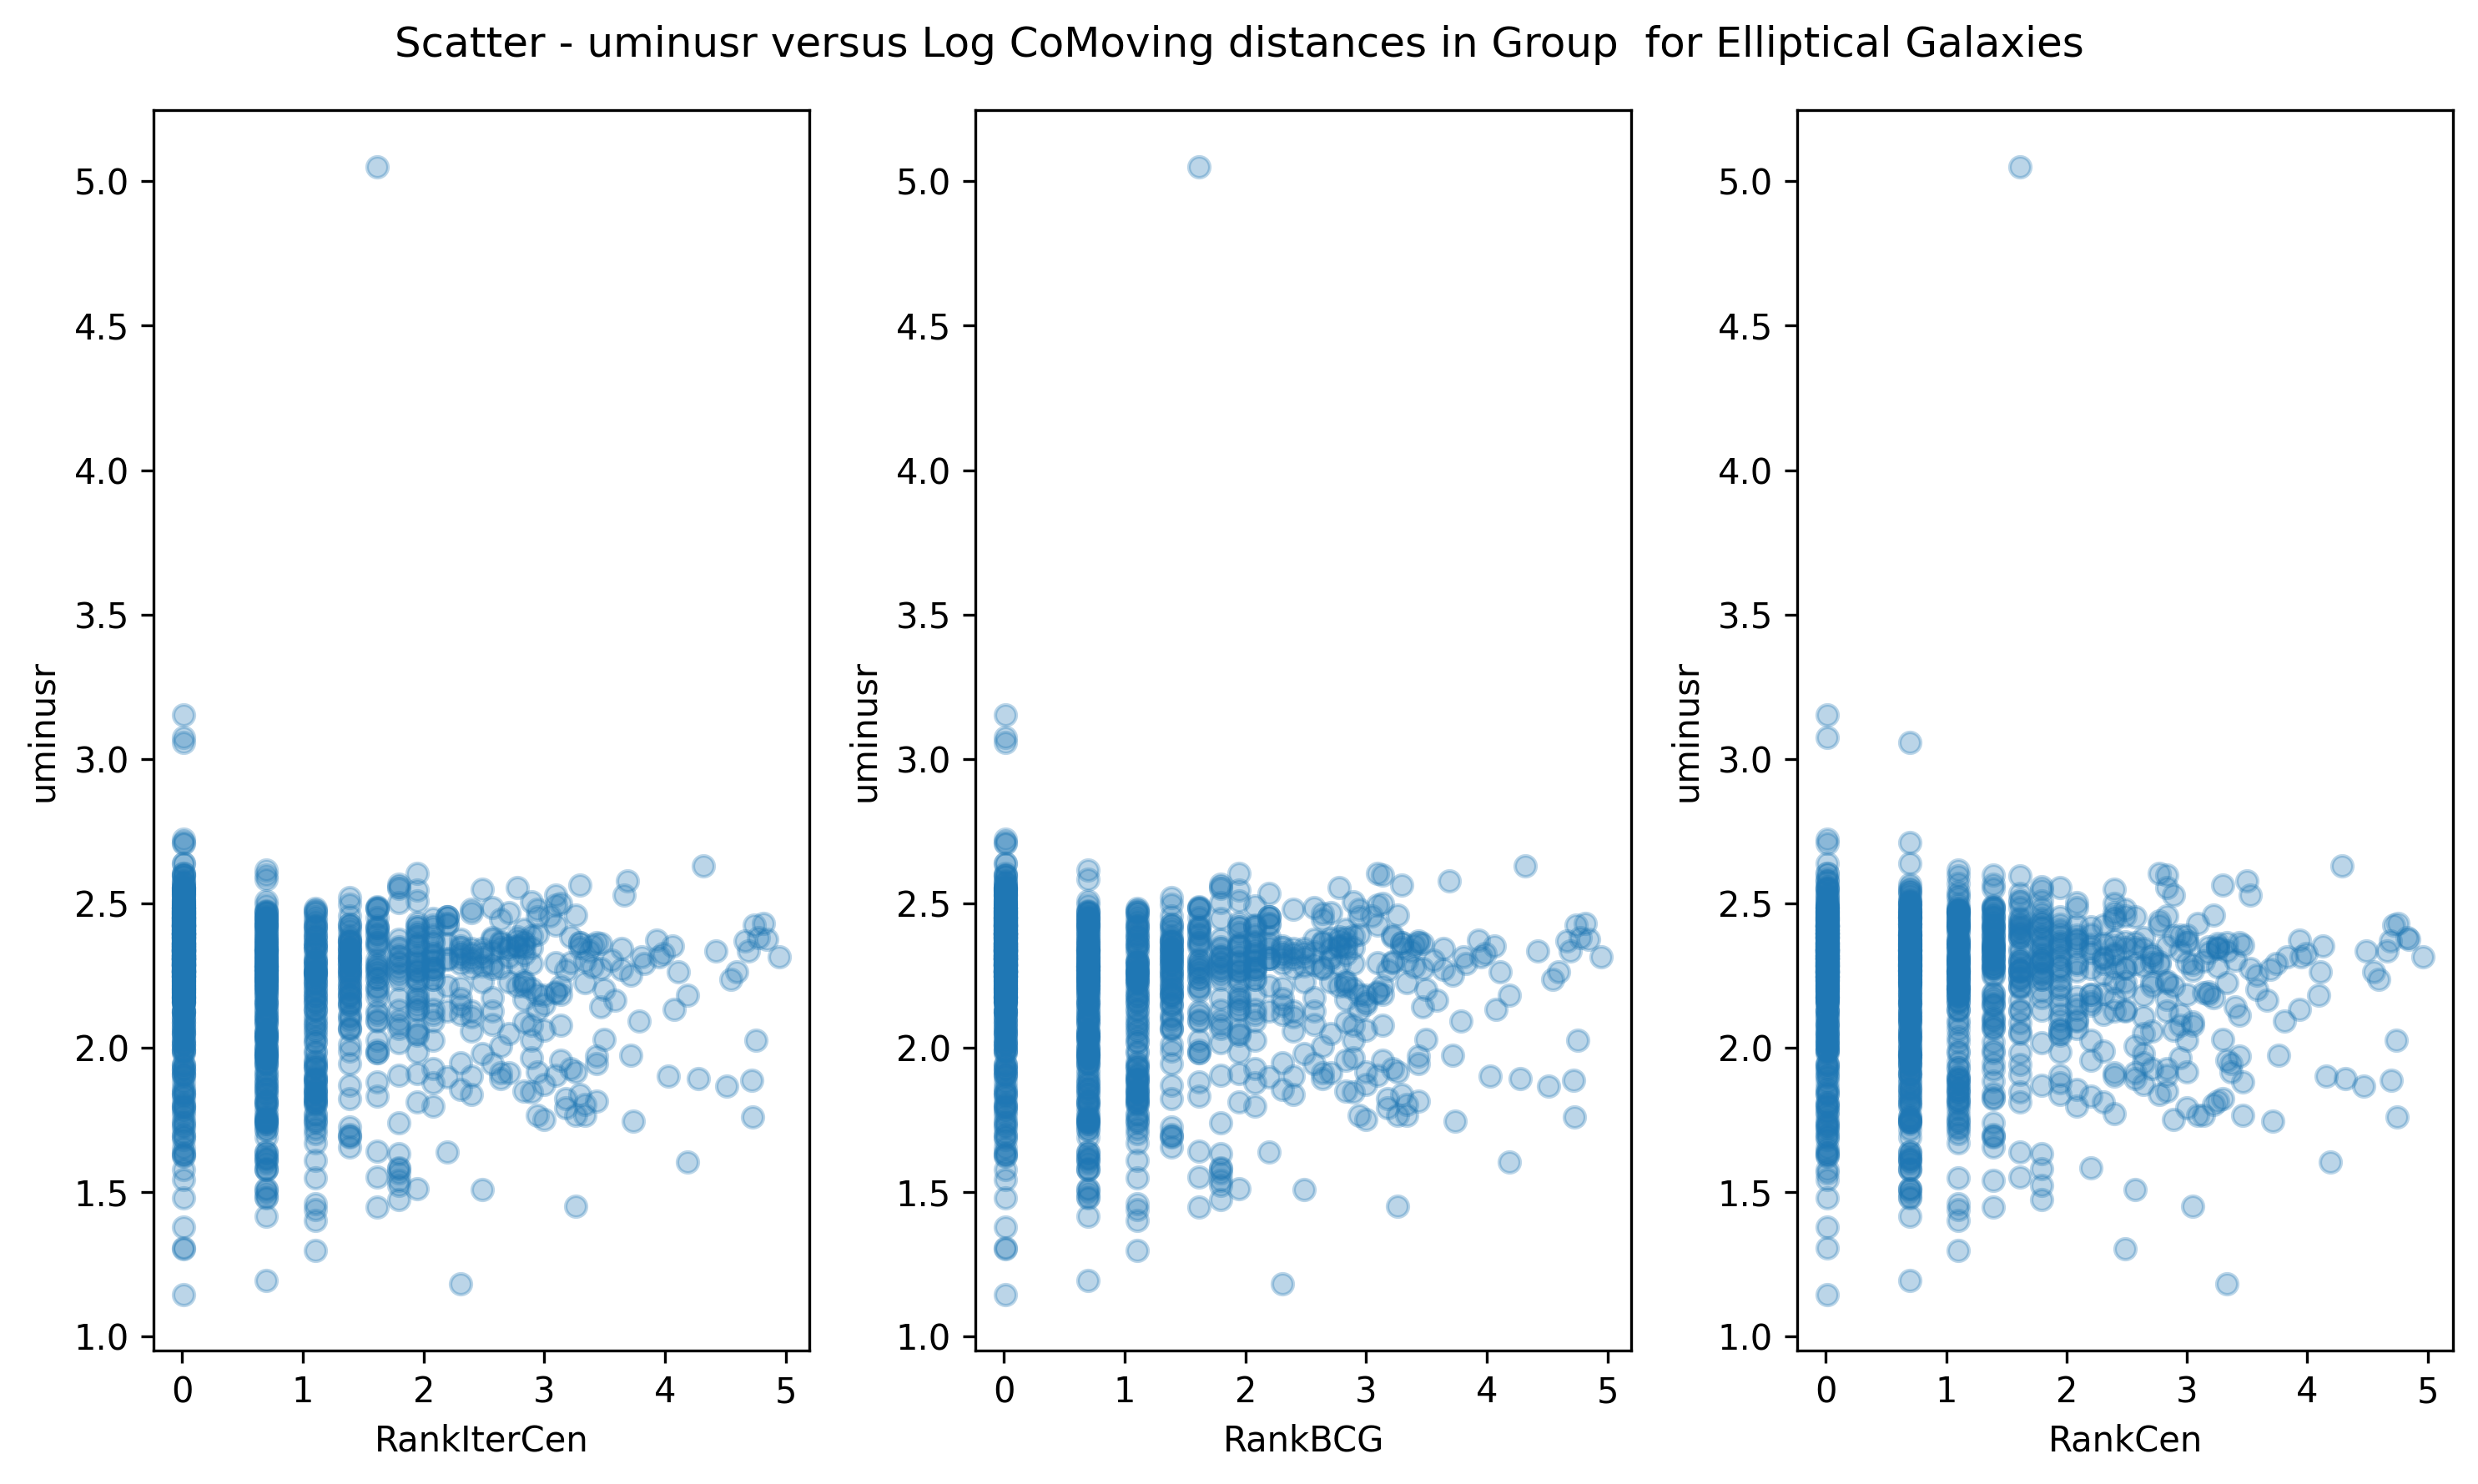

 yfield uminusr ymin 1.146385669708252 ymax 5.050988674163818

 xfield CoSepIterCen xmin 0.0 xmax 1.0987333059310913
 xfield CoSepIterCen log values - xmin -4.605170249938965 xmax 0.1032181829214096
Pearson Correlation x: CoSepIterCen y: uminusr Correlation : -0.19729999877434695 T-Test : 1.4115904843870315e-12
Linear Regresion x: CoSepIterCen y: uminusr slope : -0.03506765989382104 Intercept 2.1090906758611743 Correlation -0.1972999987743471 Wald test 1.411590484387698e-12 0.004900995335657746
 xfield CoSepBCG xmin 0.0 xmax 1.0987333059310913
 xfield CoSepBCG log values - xmin -4.605170249938965 xmax 0.1032181829214096
Pearson Correlation x: CoSepBCG y: uminusr Correlation : -0.18734991652215666 T-Test : 1.8288599153512703e-11
Linear Regresion x: CoSepBCG y: uminusr slope : -0.03286080051844959 Intercept 2.1168565922880895 Correlation -0.18734991652215677 Wald test 1.8288599153519682e-11 0.004846098679796234
 xfield CoSepCen xmin 7.361135794781148e-05 xmax 1.0317635536193848
 xfield C

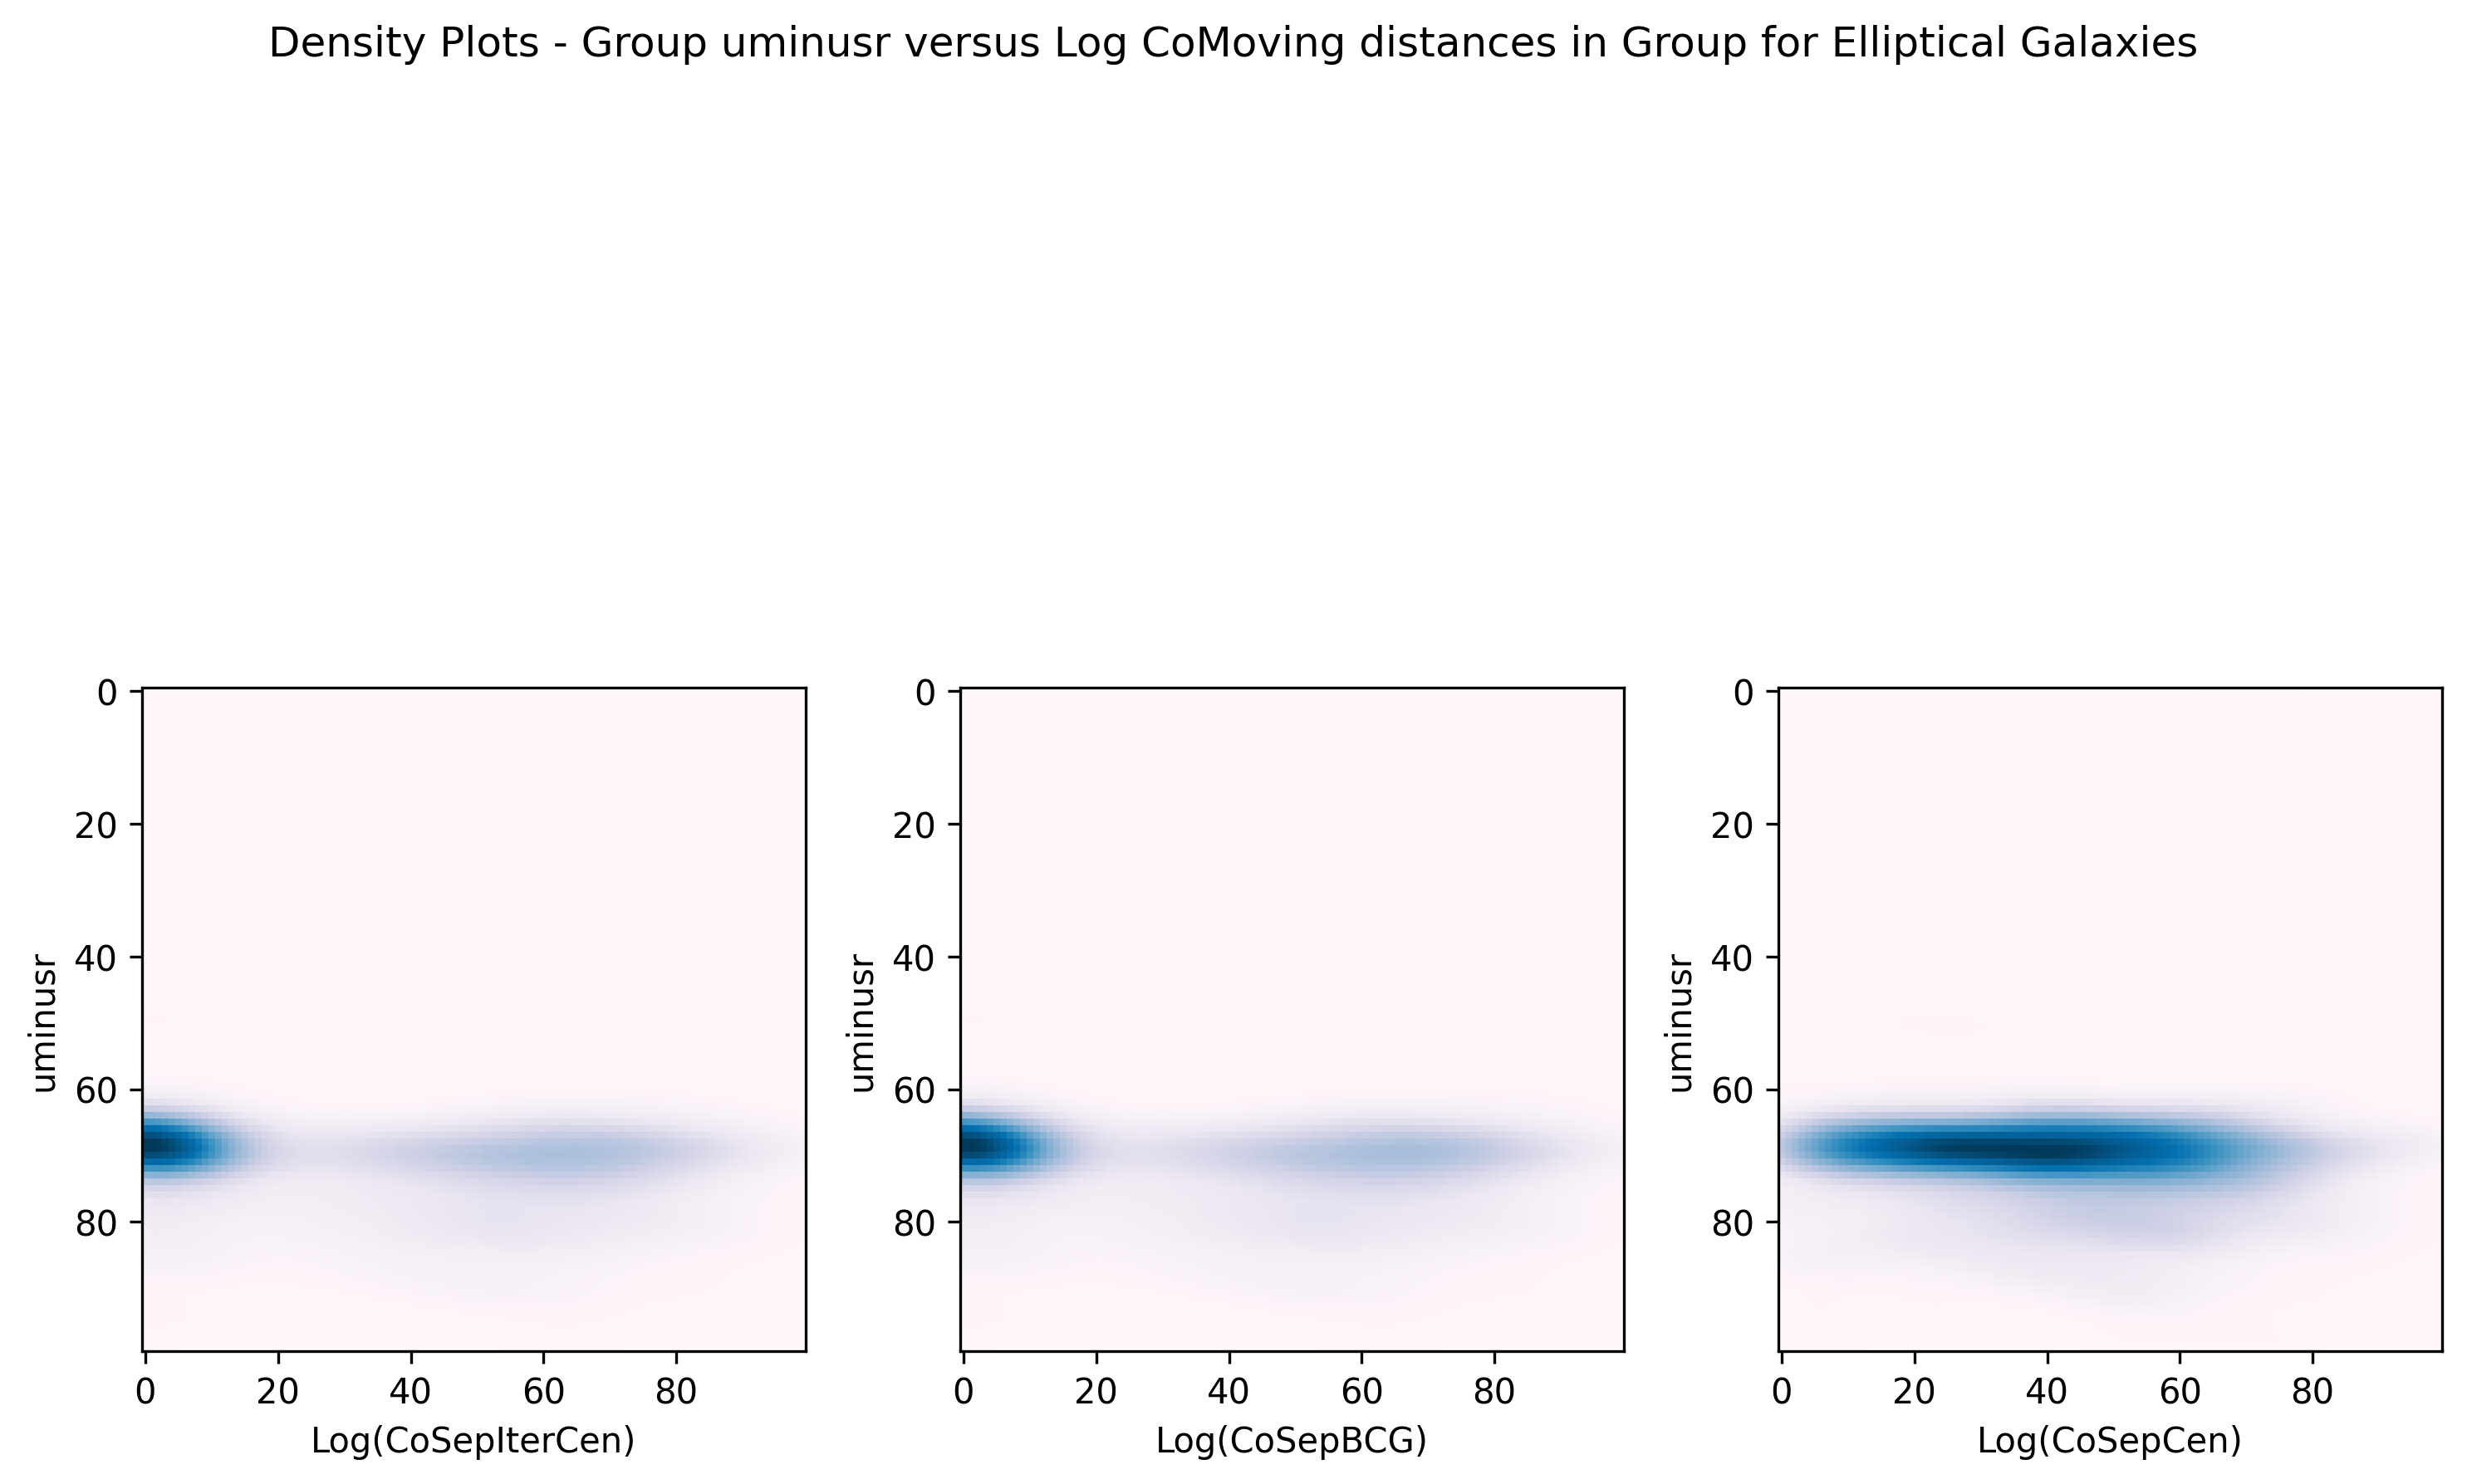

In [3]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd


ForGroup = Table.read('../../GAMA_DATA/G3CFoFGroupv10.fits')
print(f"ForGroup : {len(ForGroup)}")
## Clean Data

GroupGal = Table.read('../../GAMA_DATA/G3CGalv10.fits')
# Clean data
GroupGal = GroupGal[GroupGal['GroupID'] > 0 ]
print(f"GroupGal : {len(GroupGal)}")

StellarMasses = Table.read('../../GAMA_DATA/StellarMassesv19.fits')
# Clean Data
#StellarMasses = StellarMasses[StellarMasses['uminusr'] > 0.001]
#StellarMasses = StellarMasses[StellarMasses['logmstar'] > 0.001]
#StellarMasses = StellarMasses[StellarMasses['metal'] > 0.001]


StellarMasses = StellarMasses[StellarMasses['uminusr'] > 0.01]
StellarMasses = StellarMasses[StellarMasses['logmstar'] > 0.01]
StellarMasses = StellarMasses[StellarMasses['metal'] > 0.01]
print(f"StellarMasses : {len(StellarMasses)}")


envMeasures = Table.read('../../GAMA_DATA/EnvironmentMeasuresv05.fits')
print(f"EnvMeasures : {len(envMeasures)}")
# Clean Data
envMeasures = envMeasures[envMeasures['SurfaceDensity'] < 50]
envMeasures = envMeasures[envMeasures['AGEDenParFlag'] == 0]
envMeasures = envMeasures[envMeasures['CountInCylFlag'] == 0]


visualMorph = Table.read('../../GAMA_Data/VisualMorphologyv03.fits')
print(f"visualMorph : {len(visualMorph)}")
## Clean Data
visualMorph = visualMorph[visualMorph['ELLIPTICAL_CODE'] == 1]


DataLocalGroup = join(GroupGal,StellarMasses,keys='CATAID',join_type='inner')
print(f"Join GroupGal & StellarMasses {len(DataLocalGroup)}")
print('GroupGal & StellarMasses')
print(DataLocalGroup.colnames)

#import math

# Sum uminsur, logmstar and metal over Local Group
#DLG_Groups = DataLocalGroup.group_by('GroupID')
#GroupData = DLG_Groups['GroupID','uminusr','logmstar','metal'].groups.aggregate(np.sum)
#GroupData = DLG_Groups['GroupID','uminusr'].groups.aggregate(lambda x: -2.5*math.log(np.sum(10**(-0.4 * x))))
#print(GroupData)


#print('GroupData')
#print(GroupData.colnames)
#print('GroupGal')
#print(GroupGal.colnames)

#FinalData = join(GroupGal,GroupData,keys='GroupID',join_type='inner')
#print(FinalData)
#print(FinalData.colnames)

#FinalData = join(DataLocalGroup,envMeasures,keys='CATAID',join_type='inner')
#print('Joining Environment Measures '+str(len(FinalData)))
#print(FinalData.colnames)

RErange = join(DataLocalGroup,visualMorph,keys='CATAID',join_type='inner')
print('Joining Visual Morph '+str(len(RErange)))


alphaVal = .3
binCount = 100


                                                             
yfield = 'uminusr'

fig = plt.figure(figsize=(10, 6), dpi=300)
fig.suptitle('Scatter - '+yfield+' versus Position in Group  for Elliptical Galaxies')
xfields = ['RankIterCen','RankBCG','RankCen']
i = 1
y = RErange[yfield]
for xfield in xfields :
    ax = fig.add_subplot(1, len(xfields), i)
    i += 1           
    ax.set_ylabel(yfield)
    ax.set_xlabel(xfield)
    x = RErange[xfield]
    ax.scatter(x,y,alpha=alphaVal,label=xfield)        
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
fig.tight_layout()
#fig.savefig('../../ChartsPlots/RedScatterEnvironments.png', dpi=300, bbox_inches='tight')                      
plt.show()

fig = plt.figure(figsize=(10, 8), dpi=300)
fig.suptitle('Density Plots - Group '+yfield+' versus Position in Group  for Elliptical Galaxies')
xfields = ['RankIterCen','RankBCG','RankCen']
i = 1      
y = RErange[yfield]
ymin = min(y)
print(ymin)
ymax = max(y)
print(ymax)
for xfield in xfields :
    x = RErange[xfield]
    xmin = min(x)
    xmax = max(x)
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    ax = fig.add_subplot(1, len(xfields), i)
    ax.set_ylabel(yfield)
    ax.set_xlabel(xfield)
    i += 1           
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
    ax.imshow(np.rot90(Z), cmap='PuBu')
    #ax.plot(x, y, 'k.', markersize=2)
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
    r, p = stats.spearmanr(x,y)
    print(f"Non LOG - Spearman Correlation x: {xfield} y: {yfield} Correlation : {r} T-Test : {p}")
    r, p = stats.pearsonr(x,y)
    print(f"Non LOG - Pearson Correlation x: {xfield} y: {yfield} Correlation : {r} T-Test : {p}")
    m, c, r, p, se = stats.linregress(x,y)
    print(f"Non LOG Linear Regresion x: {xfield} y: {yfield} slope : {m} Intercept {c} Correlation {r} Wald test {p} {se}")
    
plt.show()                            
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
fig.tight_layout()
#fig.savefig('../../ChartsPlots/GroupDensityTotRmagEnvironments.png', dpi=300, bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(10, 6), dpi=300)
fig.suptitle('Scatter - '+yfield+' versus Log CoMoving distances in Group  for Elliptical Galaxies')
xfields = ['RankIterCen','RankBCG','RankCen']
i = 1
y = RErange[yfield]
for xfield in xfields :
    ax = fig.add_subplot(1, len(xfields), i)
    i += 1           
    ax.set_ylabel(yfield)
    ax.set_xlabel(xfield)
    x = np.log(RErange[xfield]+0.01)
    ax.scatter(x,y,alpha=alphaVal,label=xfield)        
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
fig.tight_layout()
#fig.savefig('../../ChartsPlots/RedScatterEnvironments.png', dpi=300, bbox_inches='tight')                      
plt.show()

fig = plt.figure(figsize=(10, 8), dpi=300)
fig.suptitle('Density Plots - Group '+yfield+' versus Log CoMoving distances in Group for Elliptical Galaxies')
#xfields = ['GalData.CountInCyl','GalData.DistanceTo5nn','GalData.SurfaceDensity','GalData.AGEDenPar']
xfields = ['CoSepIterCen','CoSepBCG','CoSepCen']
i = 1      
y = RErange[yfield]
ymin = min(y)
ymax = max(y)
print(f" yfield {yfield} ymin {ymin} ymax {ymax}\n")
for xfield in xfields :
    x = RErange[xfield]
    xmin = min(x)
    xmax = max(x)
    print(f" xfield {xfield} xmin {xmin} xmax {xmax}")
    x = np.log(RErange[xfield]+0.01)
    xmin = min(x)
    xmax = max(x)
    print(f" xfield {xfield} log values - xmin {xmin} xmax {xmax}")
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    ax = fig.add_subplot(1, len(xfields), i)
    ax.set_ylabel(yfield)
    ax.set_xlabel('Log('+xfield+')')
    i += 1           
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
    
    ax.imshow(np.rot90(Z), cmap='PuBu')
    
    #ax.plot(x, y, 'k.', markersize=2)
    
    
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
    r, p = stats.spearmanr(x,y)
    print(f"Spearman Correlation x: {xfield} y: {yfield} Correlation : {r} T-Test : {p}")
    r, p = stats.pearsonr(x,y)
    print(f"Pearson Correlation x: {xfield} y: {yfield} Correlation : {r} T-Test : {p}")
    m, c, r, p, se = stats.linregress(x,y)
    print(f"Linear Regresion x: {xfield} y: {yfield} slope : {m} Intercept {c} Correlation {r} Wald test {p} {se}")
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
fig.tight_layout()
#fig.savefig('../../ChartsPlots/GroupDensityTotRmagEnvironments.png', dpi=300, bbox_inches='tight')
plt.show()





